<a href="https://colab.research.google.com/github/GAYARRI/ARG_Repository-GraphicAnalysis/blob/master/TUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler,Normalizer


####### CREATED BY TERMINAL SCRREEN A VIRUTAL ENVIROMENT IN TGE FILES AND KERNEL FOLDER


A. IMPORTING PROVIDED  DATASETS, BUILDING WORKING DATAFRAME AND OVEREVIEW OF THE MAINFRAME DATA

In [ ]:

################################################################################################################################################################################################
### 1.- TRANSLATING PROVIDED DATASETS FROM CSV TO PYTHON DATAFRAMES
################################################################################################################################################################################################



booking_data_df=pd.read_csv('booking_data.csv')


print(booking_data_df)


reservas=booking_data_df.groupby(['segment','cust_type'])['id'].nunique()
print(reservas)


##################################################################################################################################################################################################
### 4.- SEVERAL KRY FIGURES AND FIRST RESUME "ABSTRCACTS" TO AQUIRING OBVRTVIEW KNOWLEDGE
##################################################################################################################################################################################################





                                        id  lead_time  arrival_week  duration  \
0     7e4be0a6-8ccb-4640-a758-d1944eca6a90        211             7        18   
1     4e2a0421-35df-4304-add8-30fc7de0fab3        178            31        18   
2     15dd1501-f89e-4d44-9189-412f720ebbe8        309            20        18   
3     d36f0853-9ef4-4110-b5b7-37bd1e6f200e         99            11        18   
4     fa47f667-8efc-4aea-876c-3d561668cdc2        193             2        18   
...                                    ...        ...           ...       ...   
2995  4335e720-011e-42a6-a6bc-f986356327b9        352            36        16   
2996  3aadcf5f-006a-4d97-8571-5b30f74b1cc4        179            34        18   
2997  b678d53d-62f5-4c2e-b38d-1aba1ff38d07         38            47        18   
2998  2698d346-475d-4246-905f-d82e396e3862        202            16        18   
2999  eff1e827-314a-4ed1-8aa7-34f916fa6cdb          7            45        18   

      prev_cancel  booking_

In [ ]:
import pandas as pd

###################################################################   MODULO PARA DETERMIMAR LOS TIPOS DE VARIABLES QUE SE VAN A MANEJAR EN LE DATA FRAME   ################################################################################################################


working_df=booking_data_df.copy()

print(working_df.columns)


##############################################################################################################################################################################################################################################################################


def find_boolean_columns(dataframe):

 boolean_columns = []
 for col in dataframe.columns:
     unique_values = dataframe[col].dropna().unique()

     if len(unique_values)==2:
                boolean_columns.append(col)
 return boolean_columns

boolean_columns = find_boolean_columns(working_df)

print(f' \n HAY {len(boolean_columns)} VARIABLES BIVARIANTES CON LOS SIQUIENTES NOMBRES :\n {boolean_columns}' )


#####################################################################      SELECCIONA COLUMNAS DE TIPO CATEGORICO ############################################################################################################################################################


categorical_columns = working_df.select_dtypes(include=['object']).drop(columns=boolean_columns, errors='ignore').columns
print(f'\n HAY {len(categorical_columns)} VARIABLES CATEGORICAS CON LOS SIGUIENTES NOMBRES :\n {categorical_columns.tolist()}' )



#####################################################################      SELECCIONA COLUMNAS DE TIPO FECHA ( PREVIAMENE IDENTIFICADAS ) ##############################################################################################################################




# Seleccionar columnas de tipo fecha
datetime_columns = working_df.select_dtypes(include=['datetime']).drop(columns=boolean_columns, errors='ignore').columns
print(f'\n HAY {len(datetime_columns)} VARIABLES DE FECHA CON LOS SIGUIENTES NOMBRES :\n {datetime_columns.tolist()}' )


#####################################################################      SELECCIONA COLUMNAS NUMRTICAS Y LAS SEGMENTA EN RATIOS , SOFT( DE VARIACION DE RANGO MENOR ) Y CUANTITARIVAS /( VARIACION DE RANGO MAYOR) ############################################################################################################################################################



numeric_columns = working_df.select_dtypes(include=['number']).drop(columns=boolean_columns, errors='ignore').columns

def desc_numeric_columns(dataframe,numeric_columns):

 ratio_columns = []
 soft_columns = []
 continuas_columns = []

 for col in numeric_columns:

     max_values = dataframe[col].max(skipna=True)
     min_values = dataframe[col].min(skipna=True)
     RG=max_values-min_values

     set_values = dataframe[col].dropna().unique()


     if max_values <= 1.0 and min_values >= 0.0  and len(set_values )> 2.0 :

                ratio_columns.append(col)

     elif RG < 100 and RG >= 1 and len(set_values )> 2 :

                continuas_columns.append(col)

     else:
                soft_columns.append(col)

 return ratio_columns,continuas_columns,soft_columns


ratio_columns,soft_columns,continuas_columns = desc_numeric_columns(working_df,numeric_columns)





print(f' \n HAY {len(soft_columns)} SOFT_COLUMNS CON LOS SIQUIENTES NOMBRES :\n {soft_columns}' )
print(f' \n HAY {len(ratio_columns)} RATIOS CON LOS SIQUIENTES NOMBRES :\n {ratio_columns}' )
print(f' \n HAY {len(continuas_columns)} VARIABLES CONTINUAS CON LOS SIQUIENTES NOMBRES :\n {continuas_columns}' )


Index(['id', 'lead_time', 'arrival_week', 'duration', 'prev_cancel',
       'booking_changes', 'waiting_period', 'per_day_price', 'parking',
       'special_request', 'segment', 'deposit', 'cust_type', 'is_cancelled'],
      dtype='object')
 
 HAY 1 VARIABLES BIVARIANTES CON LOS SIQUIENTES NOMBRES :
 ['is_cancelled']

 HAY 4 VARIABLES CATEGORICAS CON LOS SIGUIENTES NOMBRES :
 ['id', 'segment', 'deposit', 'cust_type']

 HAY 0 VARIABLES DE FECHA CON LOS SIGUIENTES NOMBRES :
 []
 
 HAY 7 SOFT_COLUMNS CON LOS SIQUIENTES NOMBRES :
 ['arrival_week', 'duration', 'prev_cancel', 'booking_changes', 'waiting_period', 'parking', 'special_request']
 
 HAY 0 RATIOS CON LOS SIQUIENTES NOMBRES :
 []
 
 HAY 2 VARIABLES CONTINUAS CON LOS SIQUIENTES NOMBRES :
 ['lead_time', 'per_day_price']


B. MISSING MAIN FIGURES APROACH

(3000, 14)
3000


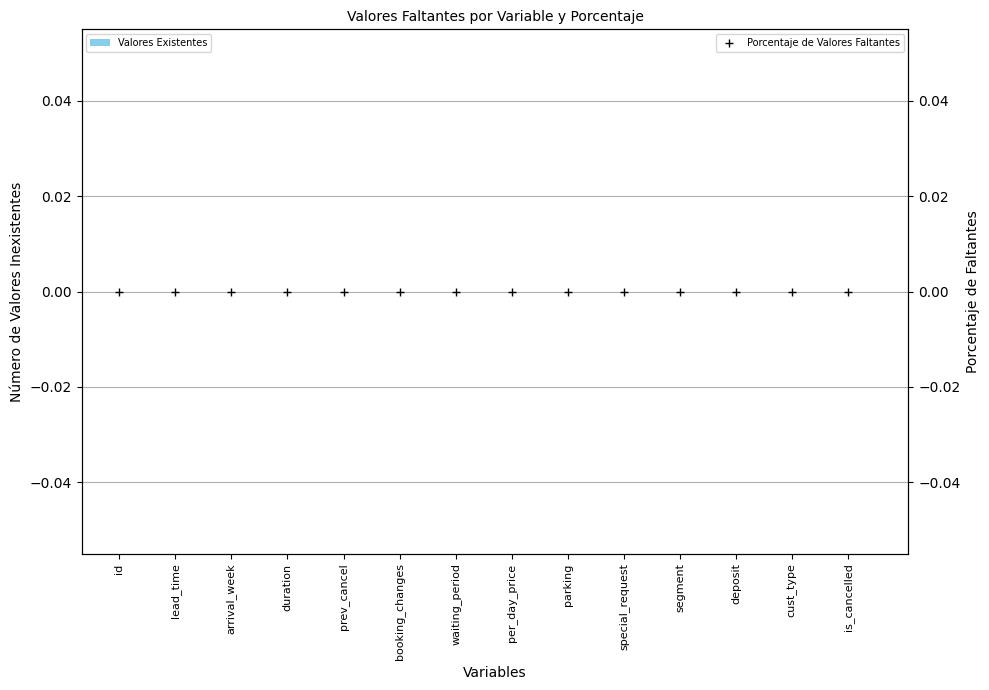

In [ ]:
###################################################################################################################################################################################################
### 1.- PROVIDED WE ARE SETTING OUR BASE CLIENT FILE AS TOTAL ( 3000 ) ##################################################################################
###################################################################################################################################################################################################
valores_faltantes = working_df.isna().sum()

pct_valores_faltantes = (working_df.isna().sum() / working_df.shape[0])*100

Behavioural_Client_clean_df=working_df.dropna()


print(working_df.shape)
print(working_df.shape[0])

######   nan_counts_per_column = working_df.isna().sum()

####################################################################################################################################################################################################
### 2.- WE PAINT MAIN FIGURES TABL OF PRESENT VALUES OVER MISSING DATA PERCENGAJE FOR CADA EVERY SINGLE VARIABLESDEL OF UNIFIIED FILE ##############################################################
####################################################################################################################################################################################################

fig, ax1 = plt.subplots(figsize=(10, 7))

# 2.1 GRAFICO DE VALORES ABSOLUTOS
ax1.bar(valores_faltantes.index, valores_faltantes, color='skyblue', width=0.4, label='Valores Existentes', align='edge')
ax1.set_xlabel('Variables')
ax1.set_ylabel('Número de Valores Inexistentes')
ax1.set_title('Valores Faltantes por Variable y Porcentaje',fontsize=10)

ax1.tick_params(axis='x', rotation=90)
ax1.tick_params(axis='x', labelsize=8)

ax1.grid(axis='y')
ax1.legend(loc='upper left')
leg1=ax1.legend(loc='upper left', fontsize=7)

# 2.2 GRAFICO DE PORCENTAJE DE VALORES FALTANTES


ax2=ax1.twinx()
ax2.plot(pct_valores_faltantes.index, pct_valores_faltantes, color='black', linestyle='None',marker='+',linewidth=1, label='Porcentaje de Valores Faltantes')
ax2.set_ylabel('Porcentaje de Faltantes')
ax2.legend(fontsize=7)


plt.tight_layout()
plt.show()

#########################################################################################################################################################################
### 3.- HEADLINES :
###
###     3.1 ORIGINAL FILE ARE PRETY AROUND 0 % OF MISSINGS CASES
###
### 4.- CONCLUSION AND AHEAD STRATEGY :
###
###     4.1 WE'LL MAINTAIN TWO MAIN GROUPS TO ANALIZE CLIENTS AND  ND OPERATIONAL SEPARATED   :
##########################################################################################################################################################################





C.- ATIPICAL VALUES OVERVIEW

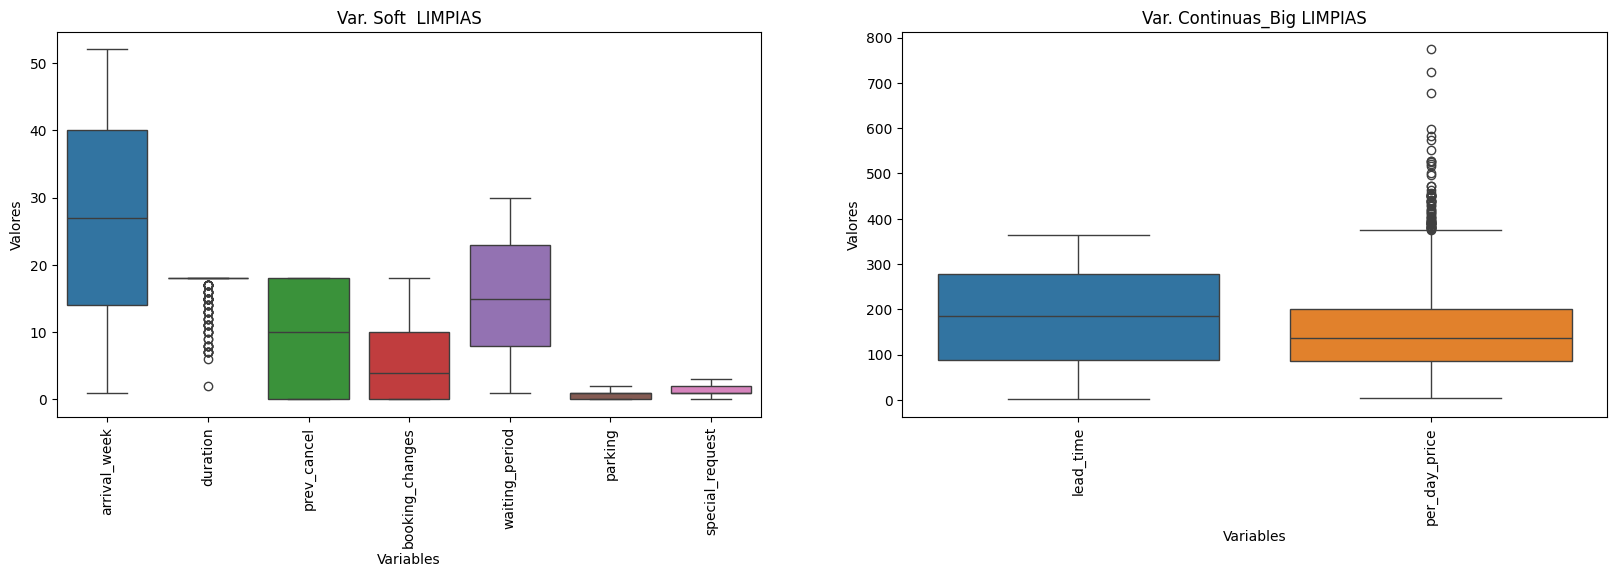

In [ ]:
##################################################################################################################################################################################################
### 1.- AS A STARTING APPROACH, WE SELECT PROPERLY CUANTITATIVE VARIABLES TO DEFINE ATTIPICAL DATA ( 41 ONES )  :
##################################################################################################################################################################################################


working1_df=working_df[continuas_columns]
working2_df=working_df[soft_columns]

##################################################################################################################################################################################################
### 2.- WE USE BOXPLOT ANALYSES, IN ORDER TO SET THIS POINT NOT IN A STRICTED ACCURACY WAY BUT AVOIDING PROBLEMS FOR OUR DATA SET ABBILITY TO GENERALIZE FUTURE BEHAVIOURS
##################################################################################################################################################################################################





Fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.boxplot(data=working1_df,ax=axes[1])
sns.boxplot(data=working2_df,ax=axes[0])


axes[1].set_xticklabels(working1_df,rotation=90)

# Añadir título y etiquetas de los ejes
axes[1].set_title('Var. Continuas_Big LIMPIAS')
axes[1].set_xlabel('Variables')
axes[1].set_ylabel('Valores')


axes[0].set_xticklabels(working2_df,rotation=90)

# Añadir título y etiquetas de los ejes
axes[0].set_title('Var. Soft  LIMPIAS')
axes[0].set_xlabel('Variables')
axes[0].set_ylabel('Valores')






plt.show()









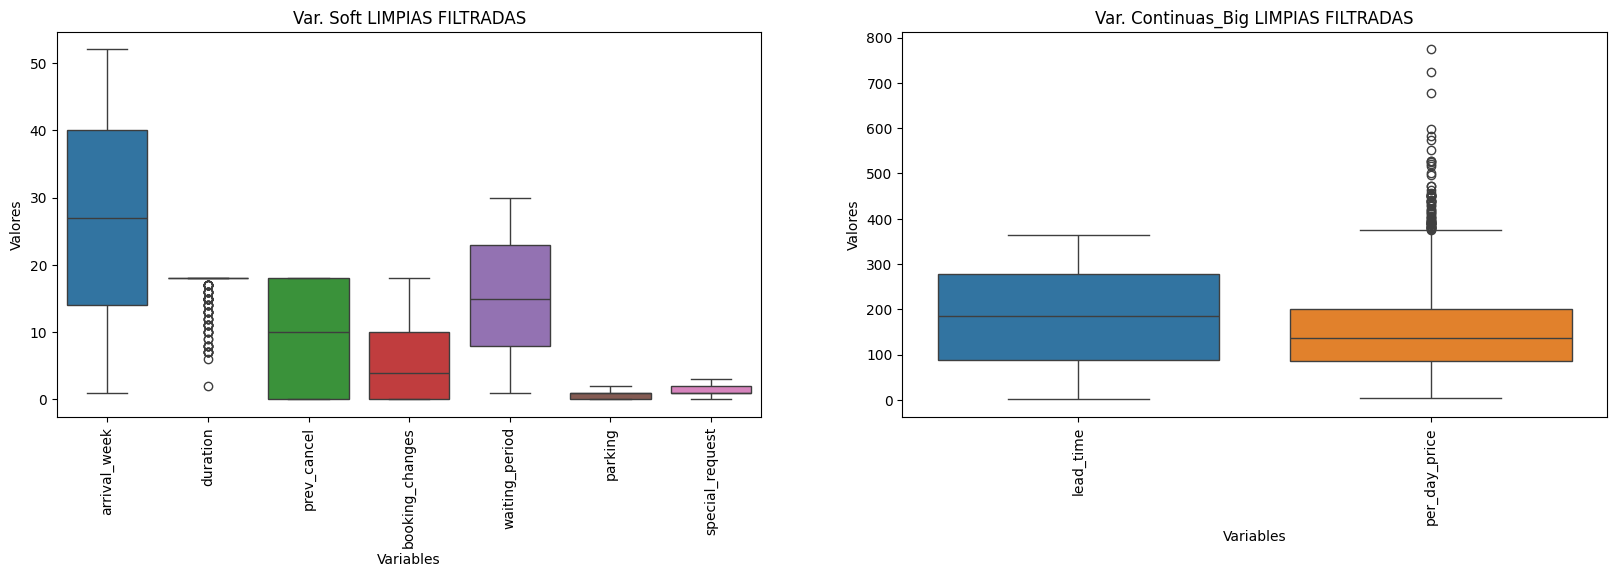

is_cancelled
0    2013
1     987
Name: id, dtype: int64


In [ ]:

####################################################################################################################################################################################################
###  3.- CRITERIA TO SET ATIPICAL DATA ( N TIMES * [Q3-Q1] , ie: COEFFICENT * IQ )
####################################################################################################################################################################################################

####################################################################################################################################################################################################
### 3.1 WE REPLACE ATIPICAL UPPERS FOR THE LAST VALUE INSIDE
####################################################################################################################################################################################################


def identificar_normales(df, lista):

    filtrado_df = df.copy()
    for col in lista:

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        upper_bound = Q3 + 1.25*IQR
        lower_bound = Q1 - 1.25*IQR



### WE CHOOSE NOT TO REPLACE ATIPICAL FOR THE LAST VALID FOR EVERY CON IN DATAFRAME

        for index, value in df[col].items():
             if value > upper_bound or value < lower_bound:

                filtrado_df.at[index, col] = last_valid

             else:
                last_valid = value

    return filtrado_df[lista]



##########################                      APLICAMOS LA FUNCION DE FILTRADO/PODADO A LOS CONJUNTOS DE DATOS                   #########################################################

datos_clientes_clean1_filter = working1_df
datos_clientes_clean2_filter = working2_df




Fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.boxplot(data=datos_clientes_clean1_filter,ax=axes[1])
sns.boxplot(data=datos_clientes_clean2_filter,ax=axes[0])



axes[1].set_xticklabels(datos_clientes_clean1_filter,rotation=90)

# Añadir título y etiquetas de los ejes
axes[1].set_title('Var. Continuas_Big LIMPIAS FILTRADAS')
axes[1].set_xlabel('Variables')
axes[1].set_ylabel('Valores')
axes[1].set_xticklabels(working1_df,rotation=90)


axes[0].set_xticklabels(datos_clientes_clean2_filter,rotation=90)

# Añadir título y etiquetas de los ejes
axes[0].set_title('Var. Soft LIMPIAS FILTRADAS')
axes[0].set_xlabel('Variables')
axes[0].set_ylabel('Valores')





plt.show()

print(working_df.groupby('is_cancelled')['id'].nunique()   )



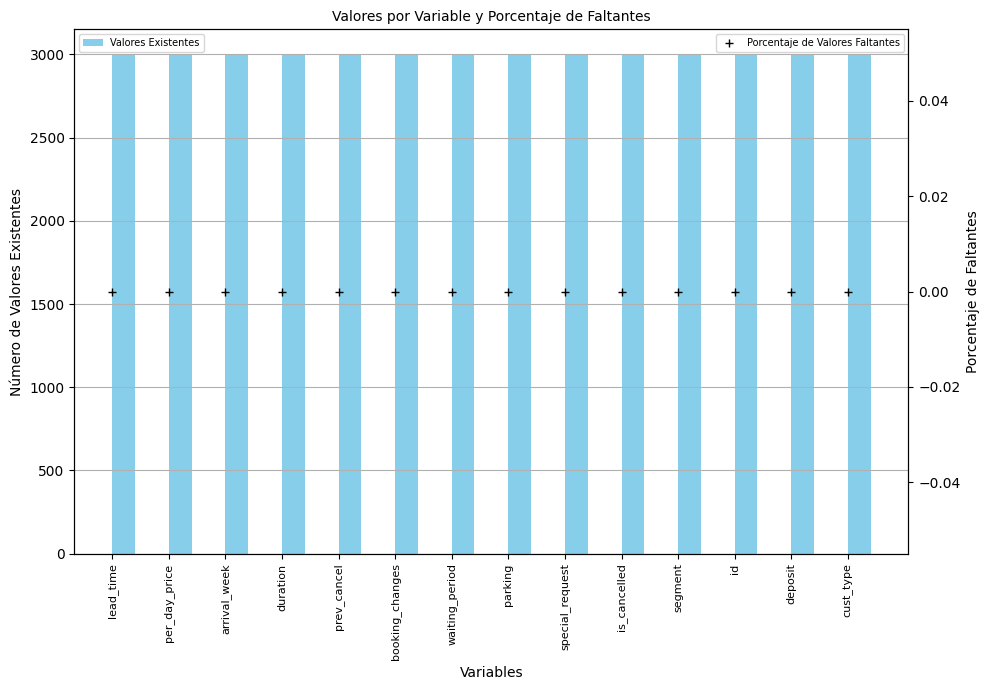

In [ ]:
##################################     UNIFICAMOS LOS DATASETS PARCIALES  ###############################################################################################################################################################################
##################################                                                     ###################################################################################################################################################################





processed_df = pd.concat([datos_clientes_clean1_filter, datos_clientes_clean2_filter, working_df[['is_cancelled', 'segment','id','deposit', 'cust_type']]],axis=1)





######################################################################################################################################################################################################################################################################

##################################################################  ASI CONSTRRUIMOS NUESTRO DATAS4ET DE TRABAJO                                               ########################################################################################################




processed_A_df = processed_df.copy()

# Calcular la serie de valores existentes y el porcentaje de valores faltantes
serie = processed_A_df.count()
pct_valores_faltantes_A = (processed_df.isna().sum() / processed_df.shape[0]) * 100

# Verificar si el índice es un MultiIndex y aplanarlo si es necesario
if isinstance(serie.index, pd.MultiIndex):
    serie.index = serie.index.map(lambda x: '_'.join(map(str, x)))
if isinstance(pct_valores_faltantes_A.index, pd.MultiIndex):
    pct_valores_faltantes_A.index = pct_valores_faltantes_A.index.map(lambda x: '_'.join(map(str, x)))

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(10, 7))

# Gráfico de valores absolutos
ax1.bar(serie.index, serie.values, color='skyblue', width=0.4, label='Valores Existentes', align='edge')
ax1.set_xlabel('Variables')
ax1.set_ylabel('Número de Valores Existentes')
ax1.set_title('Valores por Variable y Porcentaje de Faltantes', fontsize=10)
ax1.tick_params(axis='x', rotation=90)
ax1.tick_params(axis='x', labelsize=8)
ax1.grid(axis='y')
ax1.legend(loc='upper left', fontsize=7)

# Gráfico de porcentaje de valores faltantes
ax2 = ax1.twinx()
ax2.plot(pct_valores_faltantes_A.index, pct_valores_faltantes_A.values, color='black', linestyle='None', marker='+', linewidth=1, label='Porcentaje de Valores Faltantes')
ax2.set_ylabel('Porcentaje de Faltantes')
ax2.legend(loc='upper right', fontsize=7)

plt.tight_layout()
plt.show()







D.-NORMALIZING DATAFRAME

In [ ]:
copyB_df=processed_A_df.copy()

from IPython.core.interactiveshell import InteractiveShell
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder


InteractiveShell.est_node_interactivity='all'

scaler = MinMaxScaler()  # Inicializar el escalador


scaler_numeric = MinMaxScaler()

copyB_df[numeric_columns] = scaler.fit_transform(copyB_df[numeric_columns])



ordinal_encoder = OrdinalEncoder()



encoded_categorical = pd.DataFrame(ordinal_encoder.fit_transform(copyB_df[categorical_columns]), columns=categorical_columns)



encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=categorical_columns)



normalized_df = pd.concat([copyB_df[numeric_columns], encoded_categorical_df,copyB_df['is_cancelled']] ,axis=1)

normalized_df = normalized_df.drop(columns=['id'])


print(normalized_df)


      lead_time  arrival_week  duration  prev_cancel  booking_changes  \
0      0.576923      0.117647     1.000     0.055556         0.055556   
1      0.486264      0.588235     1.000     1.000000         0.500000   
2      0.846154      0.372549     1.000     0.000000         0.000000   
3      0.269231      0.196078     1.000     0.000000         0.000000   
4      0.527473      0.019608     1.000     1.000000         0.555556   
...         ...           ...       ...          ...              ...   
2995   0.964286      0.686275     0.875     0.888889         0.111111   
2996   0.489011      0.647059     1.000     0.055556         0.055556   
2997   0.101648      0.901961     1.000     0.000000         0.000000   
2998   0.552198      0.294118     1.000     0.000000         0.000000   
2999   0.016484      0.862745     1.000     0.000000         0.000000   

      waiting_period  per_day_price  parking  special_request  segment  \
0           0.241379       0.227745      0.0     

E. WE APPLY NON-SUPERVISED ( PCA) TO SEE RELEVANCE OF DIFERENT FEATURES

Varianza explicada por cada componente principal:
PC1: 51.01%
PC2: 17.33%
PC3: 12.40%


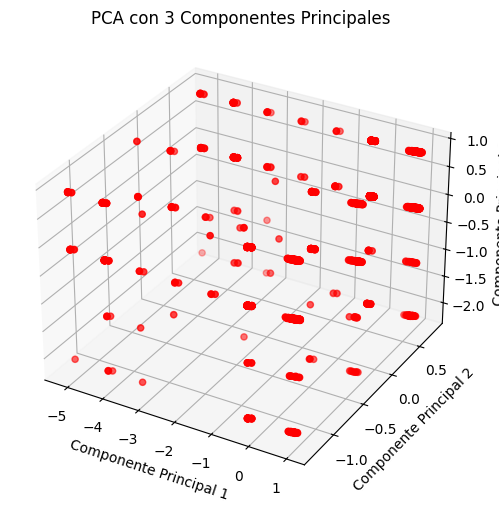

Cargas de los Componentes Principales:
                      PC1       PC2       PC3
lead_time        0.001440  0.000147 -0.008088
arrival_week     0.000572 -0.003393 -0.004255
duration        -0.001247 -0.001049 -0.001286
prev_cancel      0.182987  0.009853  0.005786
booking_changes  0.114898 -0.001809  0.006185
waiting_period   0.007592 -0.013239  0.012516
per_day_price   -0.000756 -0.006516  0.002852
parking          0.003827 -0.002465  0.001802
special_request  0.004547  0.002179 -0.005341
segment          0.975286 -0.008569 -0.000013
deposit          0.005781  0.999501  0.001802
cust_type       -0.000951 -0.001188  0.999628
is_cancelled     0.044716  0.024098 -0.019675


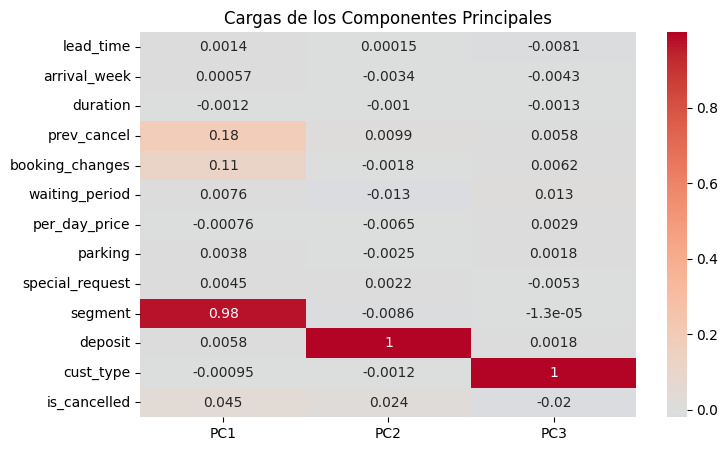

In [ ]:
#################################################################################################################################################################################################################################################
###  2. PCA  JUST IN CASE
#################################################################################################################################################################################################################################################
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np





data_df = normalized_df.copy()




# Aplicar PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data_df)

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Mostrar la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
for i, variance in enumerate(explained_variance, 1):
    print(f"PC{i}: {variance:.2%}")

# Visualizar los componentes principales en un gráfico 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'], c='r', marker='o')

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('PCA con 3 Componentes Principales')

plt.show()


loadings = pca.components_.T

# Crear un DataFrame con las cargas
loadings_df = pd.DataFrame(data=loadings, columns=['PC1','PC2','PC3'], index=normalized_df.columns)

# Imprimir las cargas de los componentes principales
print("Cargas de los Componentes Principales:")
print(loadings_df)

# Visualizar las cargas usando un gráfico de calor
plt.figure(figsize=(8, 5))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('Cargas de los Componentes Principales')
plt.show()






F.- TARGET  VS MAIN VARIABLES OF THE PRINCIPAL COMPONENTS

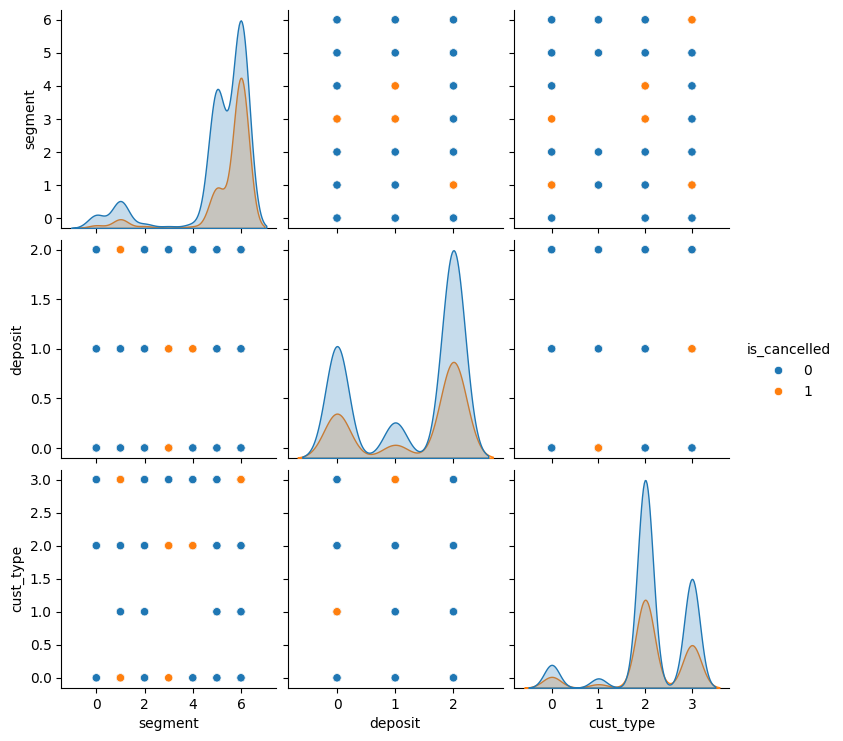

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'segment':normalized_df['segment'],
    'deposit': normalized_df['deposit'],
    'cust_type': normalized_df['cust_type']}



# Crear la matriz de dispersión
sns.pairplot(normalized_df, hue='is_cancelled', vars=['segment', 'deposit', 'cust_type'])
plt.show()


G.- CLASSIFIER BASED ON XGBOOST ALGORITM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb


# Separar características y la variable objetivo


X = normalized_df[['segment','deposit','cust_type','prev_cancel','booking_changes','waiting_period','parking','special_request','duration']]

y = normalized_df['is_cancelled']

# División de los datos en conjuntos de entrenamiento y validacion
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# División de los datos restantes en conjuntos de prueba y test
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

# Calcular el valor de scale_pos_weight
scale_pos_weight_base = (y == 0).sum() / (y == 1).sum()
scale_pos_weight = scale_pos_weight_base * 1

# Definir el clasificador XGBoost con scale_pos_weight
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',scale_pos_weight=scale_pos_weight)

# Definir los hiperparámetros a evaluar
param_grid = {
    'n_estimators': [100, 500, 2000],
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 0.8],
    'max_depth': [3, 5, 7, 20],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0, 2.0]
}

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train_train, y_train_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejor combinación de hiperparámetros: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_xgb_clf = grid_search.best_estimator_

# Predecir en el conjunto de entrenamiento
y_train_test_pred = best_xgb_clf.predict(X_train_test)

# Evaluar el rendimiento
print("Reporte de clasificación en el conjunto de entrenamiento:")
print(classification_report(y_train_test, y_train_test_pred))

print("Matriz de confusión en el conjunto de entrenamiento:")
print(confusion_matrix(y_train_test, y_train_test_pred))

# Predecir en el conjunto de validacion
y_val_pred = best_xgb_clf.predict(X_val)

# Evaluar el rendimiento en el conjunto de validacion
print("Reporte de clasificación en el conjunto de validacion:")
print(classification_report(y_val, y_val_pred))

print("Matriz de confusión en el conjunto de validacion:")
print(confusion_matrix(y_val, y_val_pred))

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Mejor combinación de hiperparámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.5, 'max_depth': 20, 'n_estimators': 100, 'subsample': 1.0}
Reporte de clasificación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       181
           1       0.63      0.53      0.57        89

    accuracy                           0.74       270
   macro avg       0.71      0.69      0.69       270
weighted avg       0.73      0.74      0.73       270

Matriz de confusión en el conjunto de entrenamiento:
[[153  28]
 [ 42  47]]
Reporte de clasificación en el conjunto de validacion:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       201
           1       0.61      0.60      0.60        99

    accuracy                           0.74       300
   macro avg       0.71      0.70      0.70       300
weight

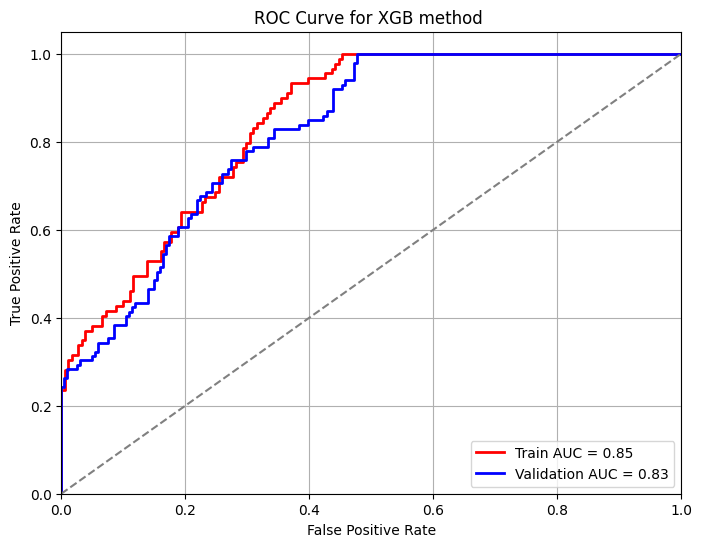

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities for positive class
y_train_test_probs = best_xgb_clf.predict_proba(X_train_test)[:, 1]
y_val_probs = best_xgb_clf.predict_proba(X_val)[:, 1]

# Compute ROC curve and AUC for training set
fpr_train, tpr_train, _ = roc_curve(y_train_test, y_train_test_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and AUC for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_probs)
roc_auc_val = auc(fpr_val, tpr_val)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'Train AUC = {roc_auc_train:.2f}')
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label=f'Validation AUC = {roc_auc_val:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGB method ')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

H.- CLASIFRIER BASED ON RANDOM FOREST ALGORITHM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Separar características y la variable objetivo
X = normalized_df[['segment','deposit','cust_type','prev_cancel','booking_changes','waiting_period','parking','special_request','duration']]
y = normalized_df['is_cancelled']

# División de los datos en conjuntos de entrenamiento y validacion
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# División de los datos restantes en conjuntos de prueba y test
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

# Definir el clasificador Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros a evaluar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None,3, 5, 10, 20, 40],
    'min_samples_split': [2, 5, 10,20],
    'min_samples_leaf': [1, 2, 4,7],
    'max_features': ['auto', 'sqrt', 'log2','float','int']
}

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train_train, y_train_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejor combinación de hiperparámetros: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_rf_clf = grid_search.best_estimator_

# Predecir en el conjunto de entrenamiento
y_train_test_pred = best_rf_clf.predict(X_train_test)

# Evaluar el rendimiento
print("Reporte de clasificación en el conjunto de entrenamiento:")
print(classification_report(y_train_test, y_train_test_pred))

print("Matriz de confusión en el conjunto de entrenamiento:")
print(confusion_matrix(y_train_test, y_train_test_pred))

# Predecir en el conjunto de validacion
y_val_pred = best_rf_clf.predict(X_val)

# Evaluar el rendimiento en el conjunto de validacion
print("Reporte de clasificación en el conjunto de validacion:")
print(classification_report(y_val, y_val_pred))

print("Matriz de confusión en el conjunto de validacion:")
print(confusion_matrix(y_val, y_val_pred))




Fitting 3 folds for each of 960 candidates, totalling 2880 fits
Mejor combinación de hiperparámetros: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Reporte de clasificación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       181
           1       1.00      0.24      0.38        89

    accuracy                           0.75       270
   macro avg       0.86      0.62      0.61       270
weighted avg       0.82      0.75      0.69       270

Matriz de confusión en el conjunto de entrenamiento:
[[181   0]
 [ 68  21]]
Reporte de clasificación en el conjunto de validacion:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       201
           1       0.93      0.27      0.42        99

    accuracy                           0.75       300
   macro avg       0.83      0.63      0.63       300


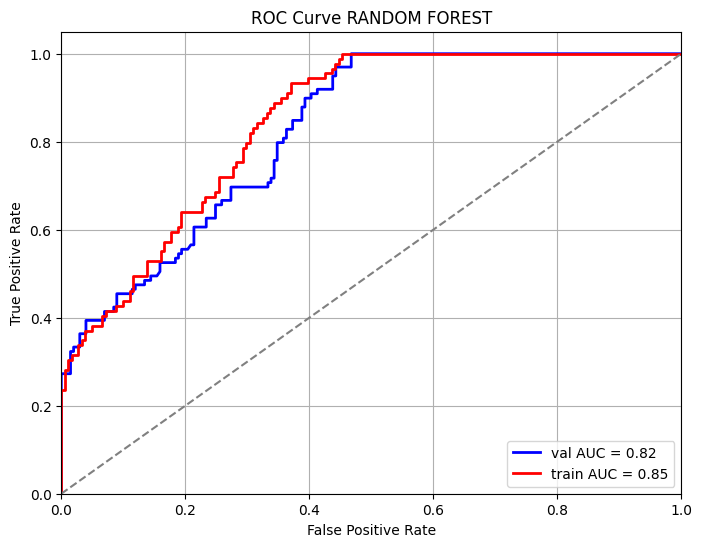

In [ ]:
# Calcular el valor de AUC y graficar la curva ROC para el conjunto de validacion
y_val_probs = best_rf_clf.predict_proba(X_val)[:, 1]
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_probs)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label=f'val AUC = {roc_auc_val:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'train AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RANDOM FOREST')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


I.- SIMPLE NEURAL NETWORK Classifier

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Separar características y la variable objetivo
X = normalized_df[['segment','deposit','cust_type','prev_cancel','booking_changes','waiting_period','parking','special_request','duration']]
y = normalized_df['is_cancelled']

# División de los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# División de los datos restantes en conjuntos de prueba y test
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


# Definir el modelo de Red Neuronal con dos capas ocultas
model = Sequential([
    Dense(512, activation='relu',input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')

])


# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

optimizer = tf.keras.optimizers.Adamlearning_rate=0.001



# Entrenar el modelo
history = model.fit(X_train_train, y_train_train,
                    epochs=50, batch_size=32,
                    validation_data=(X_val, y_val))


# Predecir en el conjunto de entrenamiento
y_train_test_probs = model.predict(X_train_test)
y_train_test_pred = (y_train_test_probs > 0.5).astype(int)

# Evaluar el rendimiento en el conjunto de entrenamiento
print("Reporte de clasificación en el conjunto de entrenamiento:")
print(classification_report(y_train_test, y_train_test_pred))

print("Matriz de confusión en el conjunto de entrenamiento:")
print(confusion_matrix(y_train_test, y_train_test_pred))

# Predecir en el conjunto de validación
y_val_probs = model.predict(X_val)
y_val_pred = (y_val_probs > 0.5).astype(int)

# Evaluar el rendimiento en el conjunto de validación
print("Reporte de clasificación en el conjunto de validación:")
print(classification_report(y_val, y_val_pred))

print("Matriz de confusión en el conjunto de validación:")
print(confusion_matrix(y_val, y_val_pred))





Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6560 - loss: 0.6427 - val_accuracy: 0.6700 - val_loss: 0.6173
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6732 - loss: 0.6179 - val_accuracy: 0.6700 - val_loss: 0.6072
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6585 - loss: 0.6259 - val_accuracy: 0.6700 - val_loss: 0.6026
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6714 - loss: 0.6054 - val_accuracy: 0.6700 - val_loss: 0.6063
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6799 - loss: 0.6021 - val_accuracy: 0.6700 - val_loss: 0.5896
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6736 - loss: 0.5964 - val_accuracy: 0.6700 - val_loss: 0.5675
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6816 - loss: 0.5588 - val_accuracy: 0.7200 - val_loss: 0.4855
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7134 - loss: 0.4879 - val_accuracy: 0.7600 - val_loss:

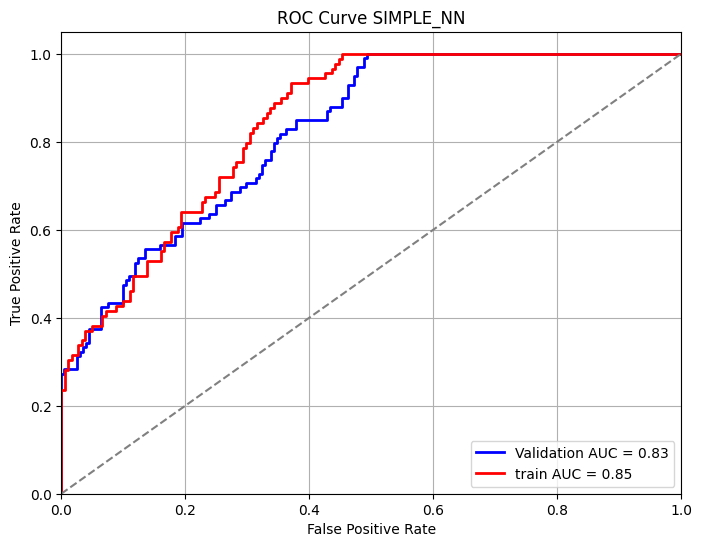

In [ ]:

# Calcular el valor de AUC y graficar la curva ROC para el conjunto de validación
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_probs)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label=f'Validation AUC = {roc_auc_val:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'train AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SIMPLE_NN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


J.- CONCLUSIONS

WE ARE TRYING TO PREDICT CANCELATIONS BASED ON A SET WITH 13 FEATURES
WITH THIS INFORATION SET  AFTER OVERVIEWING THERE IS NO NAN'S AND ATIPICAL ARE NOT RELEVANTE AT LEAST , WE HAVE TRIED THE FOLLO9WING :
- PCA'S TO BE SURE ABOUT THE RELEVANCE OF EVERY DATA AND TO TRY TO ELIMINATE INFORMATION REDUNDANT
- WE SELECT A COLLECTION OF FEATURES TO LATER INCLUDE IT IN A MODE
- THE COLLECTION SELECTED IS :   SEGMENT, DEPOSIT, CUST_TYPE, PREV_CANCEL ,BOOKING_CHANGES, WAITING_PERIOD, PARKING, SPECIAL_REQUEST]
- ON THIS SET WE HAVE APPLIED 3 MODELS FOR CLASSIFICATION PREDICT : XGBOOST , RANDOM_FOREST AND SIMPLE NEURAL NETWORK

ALL OF THREE MODELS DRIVE IN A ROUGH WAY THE SAME NUMBERS :
- PRECISSION ABOUT 80 %
- RECALL ABOUT 60 %

RESULTS NOT SEEM TO BE AFECTED FOR AN EXTREM OVERFIITING

IN A GENERAL WAY WE THINK THIS COULD BE USEFULL TO PRECICT THE EFECT OF CANCELATIONS IN OUR BUSINESS , TO MAKE A PROVISSION IN THE FINAL REVENUE  

WE SHOULD TAKE DATES VARIABLES TO BE SURE THIS FACT IS NOT REALLY AFFECTED FOR STATIONAL EFFECTS ( WHAT IS VERY PROBABLE )

AT THE SAME TIME WE SHOULD TRY TO DO SURVEYS WITH CLINTES ABOUT EXPECTIONS PRE-BOOKING AND SENTIMENT AFTER EXPERIENCE , TRYING TO KNOW MORE ABOUT OUT OWN WEAKNESS  AND STRENGTHS  AND  CLUSTERS OF CLIENTS WE HAVE

AND THERE ARE CERTAINS ENVIROMENT VARIABLES WE COUD GET INTO OUR MODEL , LIKE ECONOMIC EXPECTATIONS , ORIGIN PLACES OF OUR CLIENTES AND RELEVANT ISSUES IN THOSE COUNTRIES , ETC.

